# Storytelling Data Visualization on Exchange Rates

There are two types of data visualization:¶

* Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
* Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

We worked on below points throughout the project.
* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for  an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib
* How to guide the audience's attention with pre-attentive attributes:
* How to use Matplotlib built-in styles - with a case study on the FiveThirtyEight style

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.shape

(6456, 41)

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar','Period\\Unit:': 'Time'}, inplace=True)

In [6]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

In [7]:
exchange_rates.sort_values('Time', inplace=True)

In [8]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [9]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

In [10]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


# Rolling mean

In [12]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

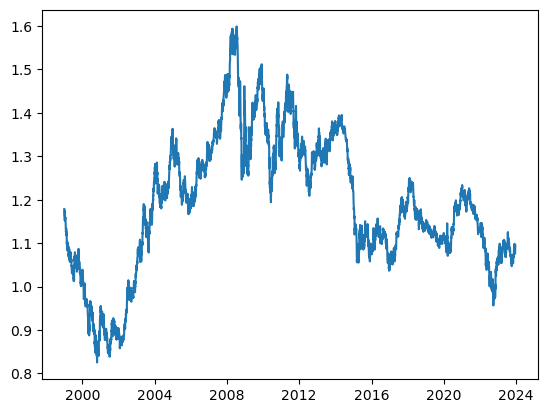

In [13]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.show

In [14]:
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [15]:
values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values

,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


In [16]:
values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


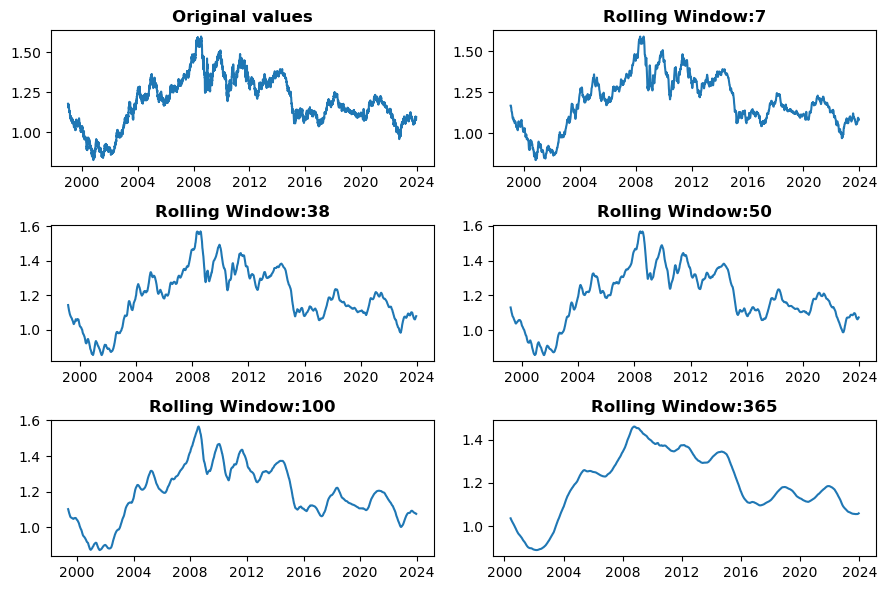

In [17]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip ([2, 3, 4, 5, 6],
                            [7, 38, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
            euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    #plt.ylim(range(1,1.8,0.2))
    
plt.tight_layout() # Auto adjust the padding between subplots
plt.show()

In [18]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


# Storytelling Data Visualization

Financial Crisis 2007 - 2008

In [19]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >=2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >=2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

<function matplotlib.pyplot.show(close=None, block=None)>

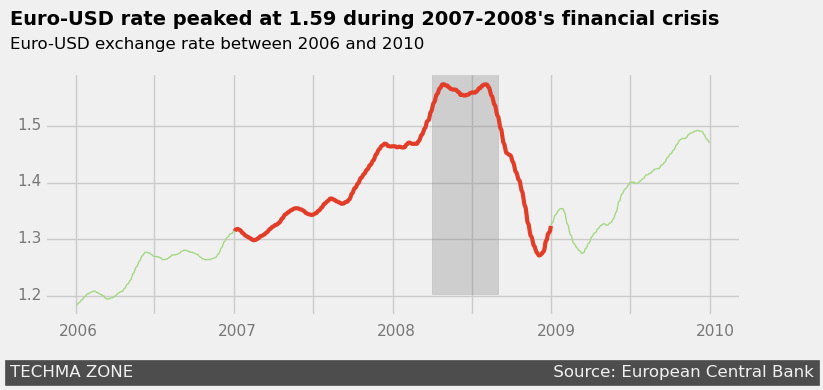

In [20]:
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot 
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Hightlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

#print(ax.set_xticklabels(["2006", "", "2007", "", "2008", "", "2009", "", "2010"],alpha = 0.3))

ax.set_xticklabels([])

x = 0.02
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, -0.08, year, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    x += 0.22888
    
#print(plt.yticks())

ax.set_yticklabels([])

y = 0.07
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(-.04, y , rate, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    y += 0.2333
    
## Adding a title and subtitle
ax.text(-0.05, 1.2, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
       weight = "bold", transform = plt.gca().transAxes)
ax.text(-0.05, 1.1, 'Euro-USD exchange rate between 2006 and 2010',
       size = 12, transform = plt.gca().transAxes)

## Adding a signature
ax.text(-.05, -0.25, 'TECHMA ZONE' + ' '*80 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=12, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"), ymin=0.09,
          alpha=0.3, color='grey')

plt.show

    

# COVID19

In [21]:
corona_crisis_20 = euro_to_dollar.loc[(euro_to_dollar['Time']>= '2020-01-01')&
                                      (euro_to_dollar['Time']<= '2020-12-31')]
corona_crisis = euro_to_dollar.loc[(euro_to_dollar['Time']>='2016-01-01')&
                                      (euro_to_dollar['Time']<='2019-12-31')]

<function matplotlib.pyplot.show(close=None, block=None)>

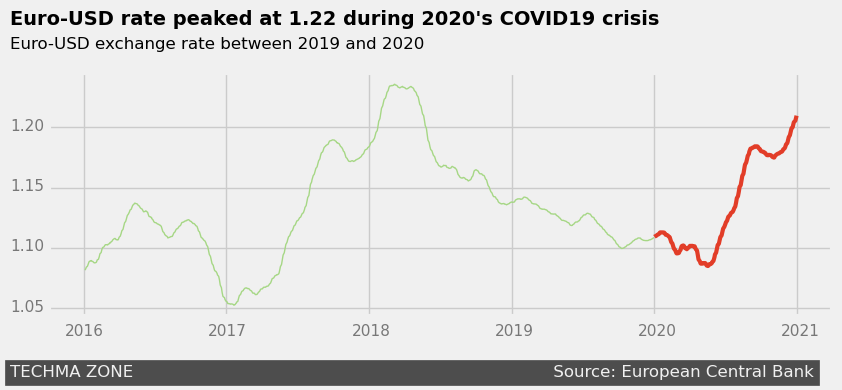

In [22]:
import matplotlib.style as style 
style.use('fivethirtyeight')

###Adding the plot
fig,ax = plt.subplots(figsize=(9,3))
ax.plot(corona_crisis['Time'],
        corona_crisis['rolling_mean'],
        linewidth=1,color='#A6D785')

###Highlighting the 2007-2008 period
ax.plot(corona_crisis_20['Time'],
        corona_crisis_20['rolling_mean'],
        linewidth=3, color='#e23d28')

ax.set_xticklabels([])

x = 0.02
for year in ['2016', '2017', '2018', '2019', '2020', '2021']:
    ax.text(x, -0.08, year, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    x += 0.183

ax.set_yticklabels([])

y = 0.02
for rate in ['1.05', '1.10', '1.15', '1.20']:
    ax.text(-.05, y , rate, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    y += 0.248

## Adding a title and subtitle
ax.text(-.05, 1.2, "Euro-USD rate peaked at 1.22 during 2020's COVID19 crisis",
       weight = "bold", transform = plt.gca().transAxes)

ax.text(-0.05, 1.1, 'Euro-USD exchange rate between 2019 and 2020',
       size = 12, transform = plt.gca().transAxes)

## Adding a signature
ax.text(-.05, -0.25, 'TECHMA ZONE' + ' '*80 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=12, transform = plt.gca().transAxes)

plt.show


# The Three US Presidencies Example

In [23]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >=2001) & (euro_to_dollar['Time'].dt.year < 2021)]

bush = bush_obama_trump.copy(
        )[bush_obama_trump['Time'].dt.year < 2009]

obama = bush_obama_trump.copy(
        )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]

trump = bush_obama_trump.copy(
        )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]


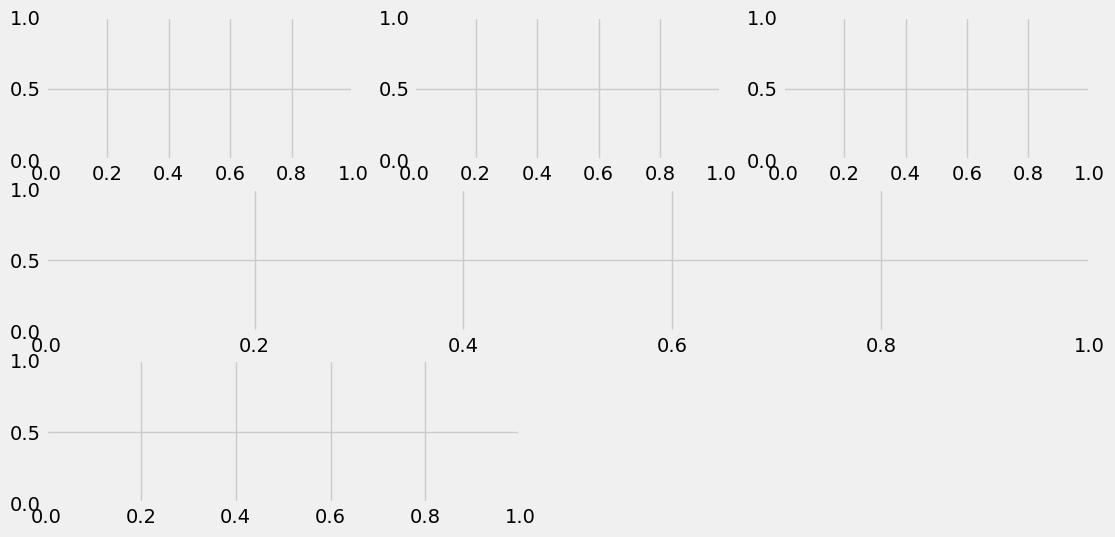

In [24]:
## adding the Fivethirtyeight
style.use('fivethirtyeight')

## Adding the subplots
plt.figure(figsize=(12, 6))
# pattern 1 
ax1 = plt.subplot(3,3,1) # row,col, index
ax1 = plt.subplot(3,3,2)
ax1 = plt.subplot(3,3,3)

#pattern 2
ax4 = plt.subplot(3,1,2) # row, col, index

#pattern 3 
ax4 = plt.subplot(3,2,5) # row, col, index






<function matplotlib.pyplot.show(close=None, block=None)>

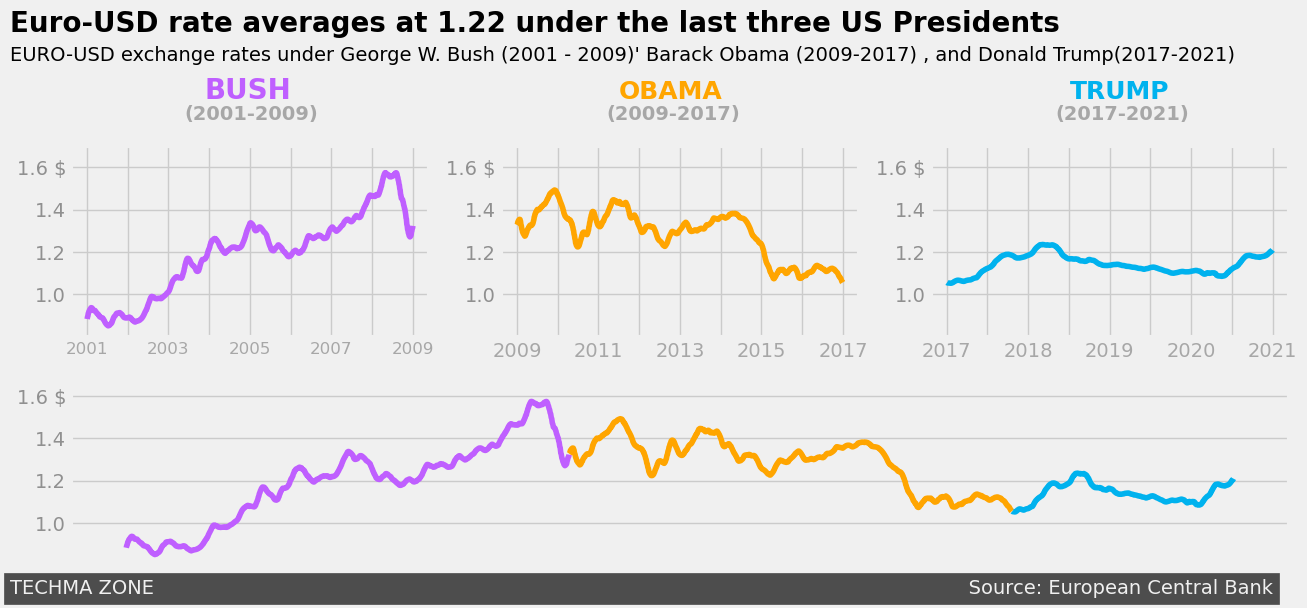

In [25]:
## adding the Fivethirtyeight style
style.use('fivethirtyeight')

## Adding the subplots
plt.figure(figsize=(14, 8))
# pattern 1 
ax1 = plt.subplot(3,3,1) # row,col, index
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

#pattern 2
ax4 = plt.subplot(3,1,2) # row, col, index

axes = [ax1, ax2, ax3, ax4]

###changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6 $'],
                      alpha=0.4)
    
### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001' , '', '2003', '', '2005', '','2007', '', '2009'],
                    alpha=0.3, size =12)
ax1.text(0.11, 2.45, 'BUSH', fontsize=20, weight='bold',
        color='#BF5FFF',transform = plt.gca().transAxes)
ax1.text(0.093,2.34, '(2001-2009)', weight='bold',
         alpha=0.3, transform = plt.gca().transAxes)

###Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009' , '', '2011', '', '2013', '','2015', '', '2017'],
                    alpha=0.3)
ax2.text(0.45, 2.45, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500',transform = plt.gca().transAxes)
ax2.text(0.44, 2.34, '(2009-2017)', weight='bold',
         alpha=0.3, transform = plt.gca().transAxes)

###Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017' , '', '2018', '', '2019', '','2020', '', '2021'],
                    alpha=0.3)
ax3.text(0.82, 2.45, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE',transform = plt.gca().transAxes)
ax3.text(0.808, 2.34, '(2017-2021)', weight='bold',
         alpha=0.3, transform = plt.gca().transAxes)


###Ax3: Bush-Obama-Trump

ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')

ax4.set_xticks([])

## Adding a title and subtitle
ax1.text(-0.05, 2.8, "Euro-USD rate averages at 1.22 under the last three US Presidents",
         fontsize=20, weight = 'bold', transform = plt.gca().transAxes)

ax1.text(-0.05, 2.65, '''EURO-USD exchange rates under George W. Bush (2001 - 2009)' Barack Obama (2009-2017) , and Donald Trump(2017-2021)''',
         fontsize = 14, transform = plt.gca().transAxes)

## Adding a signature
ax4.text(-0.05, -0.15, 'TECHMA ZONE' + ' '*133 + 'Source: European Central Bank',
       color = '#f0f0f0', backgroundcolor = '#4d4d4d',
       size=14, transform = plt.gca().transAxes)

plt.tight_layout()
plt.show
